# Classify IMDB Movie Reviews using an LSTM model in Deep Learning
##### I will build a Long Short-Term Memory (LSTM) nerual architecture using Keras to classify English movie reviews (from the IMDB dataset) based on their sentiment, into two classes - Positive and Negative

##Import the IMDB dataset from Keras
##### The IMDB dataset comes inbuilt in the Keras framework

In [1]:
# Import the dataset from keras.datasets module
from keras.datasets import imdb

# Limit the maximum size of the vocabulary to VOCAB_SIZE
# Only top VOCAB_SIZE most frequently occurring words in the dataset will be considered
# Discarding rarely words would help keep a manageable size
# Words in the training set which are not among the top VOCAB_SIZE most frequent words, will be marked by the 'out of vocabulary' character.
# Words occurring in the test set (but not in the training set) which are not among the top VOCAB_SIZE most frequent words are skipped.
VOCAB_SIZE = 20000
# Skip the most frequently occurring SKIP_COUNT
# These words are often articles/determiner/prepositions (Eg. a, the, an etc) and hence not helpful classifying the reviews
SKIP_COUNT = 0
# Filter out sentences which are longer than MAX_LENGTH
MAX_LENGTH = None

print("Loading the IMDB dataset...")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE, skip_top=SKIP_COUNT, maxlen=MAX_LENGTH)
print("Dataset loaded!")

Loading the IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded!


In [2]:
print("Size of training set :", len(train_data))
print("Size of test set     :", len(test_data))

Size of training set : 25000
Size of test set     : 25000


In [3]:
print("Sample training example:")
print(train_data[3])
print("Label:")
print(train_labels[3])

Sample training example:
[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 15305, 744, 35, 3715, 761, 61, 5766, 452, 9214, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 6004, 4, 1615, 5, 2, 7, 5168, 17, 13, 7064, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 18435, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 9225, 145, 143, 5122, 12, 7039, 537, 7

In [4]:
# Get the mapping from each word in vocabulary to its index
word_to_index = imdb.get_word_index()

index_to_word = dict ( [(idx, word) for (word, idx) in word_to_index.items()] )


# Check the review in English too
english_review = ' '.join ( [index_to_word.get(idx-3, '?') for idx in train_data[3]] )
# NOTE: In the dataset,
#       index 0 is reserved for "padding",
#       index 1 is reserved for "start of sequence"
#       index 2 is reserved for "unknown"
#
# However, this is not followed in the word-to-index mapping obtained from imdb.get_word_index()
# In the mapping, index 0 is for None, and thereafter, index i maps to the word at index i-3 (i.e. "padding", "start of sequence" and "unknown" are skipped in the mapping)
# Hence the change in the above line of code

print("Earlier training example in English:")
print(english_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Earlier training example in English:
? the scots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional reservoir fact and fiction blend with ? role models warning 

In [5]:
# Since vocabulary size is restricted to VOCAB_SIZE, no word index should be greater than VOCAB_SIZE
max_index = max ( [max(review) for review in train_data] )

print("VOCAB_SIZE          =", VOCAB_SIZE)
print("Max index of a word =", max_index)

VOCAB_SIZE          = 20000
Max index of a word = 19999


## Prepare the dataset
##### Pad the integer sequences

In [6]:
# Find and store the length of the longest review in the dataset
max_train_length = max (len(review) for review in train_data)
max_test_length = max (len(review) for review in test_data)

max_length = max(max_train_length, max_test_length)
print("Maximum length of a review in dataset:", max_length)

Maximum length of a review in dataset: 2494


In [7]:
from keras.preprocessing.sequence import pad_sequences

# Pad each review in the dataset till their length = max_length
print("Padding the reviews...")
train_data = pad_sequences (train_data, maxlen=max_length)
test_data = pad_sequences (test_data, maxlen=max_length)

print("Shape of train_data =", train_data.shape)
print("Shape of test_data  =", test_data.shape)

Padding the reviews...
Shape of train_data = (25000, 2494)
Shape of test_data  = (25000, 2494)


## Build the model
##### I build an RNN-LSTM architecure using Keras Sequential API

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE,
                    output_dim=32,
                    input_length=max_length))
model.add(LSTM(units=128,
               activation = 'tanh',
               recurrent_activation = 'sigmoid',
               dropout = 0.0,
               recurrent_dropout = 0.0,
               return_sequences = False,
            #    kernel_regularizer = l2(0.01),
            #    recurrent_regularizer = l2(0.01),
            #    bias_regularizer = l2(0.01)
            ))
model.add(Dense(units = 64,
                activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 32,
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

## Train the model and tune the Hyperparameters

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from sklearn.model_selection import train_test_split
import numpy as np
import os

# Ensure directory exists for saving models
os.makedirs('/content', exist_ok=True)

# Corrected callback list with proper metric names
callback_list = [
    ModelCheckpoint(
        filepath='/content/LSTM_model.keras',
        monitor='val_acc',  # Use 'val_acc' to match model compilation
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode='max'
    ),

    EarlyStopping(
        monitor='val_acc',  # Use 'val_acc' to match model compilation
        patience=10,
        verbose=1,
        mode='max',
        baseline=0.5,
        restore_best_weights=True
    ),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        verbose=1,
        mode='min',
        cooldown=1,
        min_lr=0,
    ),

    TerminateOnNaN()
]

# Split data into training and validation sets
print("Splitting data into training/validation sets...")
X_train, X_val, y_train, y_val = train_test_split(
    train_data,
    train_labels,
    test_size=0.2,
    random_state=42
)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(test_labels)

print("\nDataset shapes:")
print(f"Training data   : {X_train.shape} | Labels: {y_train.shape}")
print(f"Validation data : {X_val.shape}   | Labels: {y_val.shape}")
print(f"Test data       : {test_data.shape} | Labels: {y_test.shape}")

# Train the model
print("\nTraining the model with hyperparameter tuning...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    callbacks=callback_list,
    verbose=1
)

# Evaluate on test set
print("\nEvaluating best model on test set...")
test_loss, test_acc = model.evaluate(test_data, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Print training summary with correct keys
print("\nTraining summary:")
print(f"Final training accuracy: {history.history['acc'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_acc'][-1]:.4f}")
print(f"Total epochs trained: {len(history.history['loss'])}")

# Optional: Show all available keys
print("\nAll available history keys:", list(history.history.keys()))

Splitting data into training/validation sets...

Dataset shapes:
Training data   : (20000, 2494) | Labels: (20000,)
Validation data : (5000, 2494)   | Labels: (5000,)
Test data       : (25000, 2494) | Labels: (25000,)

Training the model with hyperparameter tuning...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - acc: 1.0000 - loss: 1.8815e-04
Epoch 1: val_acc improved from -inf to 0.85860, saving model to /content/LSTM_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - acc: 1.0000 - loss: 1.9031e-04 - val_acc: 0.8586 - val_loss: 1.2301 - learning_rate: 8.0000e-06
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - acc: 0.9999 - loss: 7.8516e-04
Epoch 2: val_acc did not improve from 0.85860
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - acc: 0.9999 - loss: 7.8370e-04 - val_acc: 0.8584 - val_loss: 1.2305 - learning_rate: 8.0000e-06
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - acc: 1.0000 - loss: 3.6667e-04
Epoch 3: val_acc did not improve from 0.85860
157/1

## Plot the results

Available keys in history: ['acc', 'loss', 'val_acc', 'val_loss', 'learning_rate']


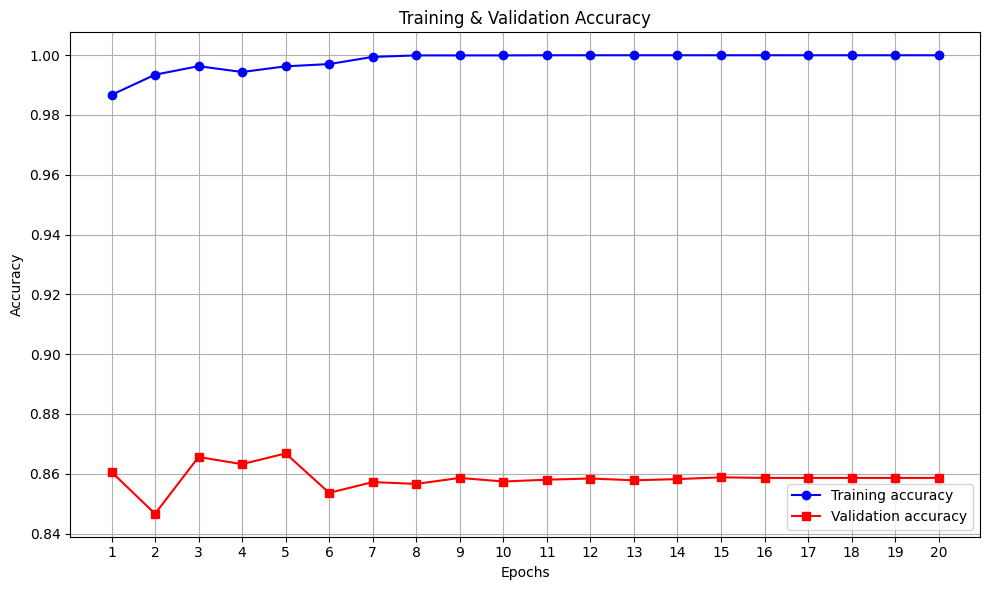

In [20]:
import matplotlib.pyplot as plt

# Check available keys in history to handle different Keras versions
print("Available keys in history:", list(history.history.keys()))

# Determine correct key names for metrics
train_acc_key = 'accuracy' if 'accuracy' in history.history else 'acc'
val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_acc'

# Extract metrics using correct keys
train_acc = history.history[train_acc_key]
val_acc = history.history[val_acc_key]

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'rs-', label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(epochs)  # Show all epoch numbers on x-axis
plt.tight_layout()

plt.show()

Available keys in history: ['acc', 'loss', 'val_acc', 'val_loss', 'learning_rate']


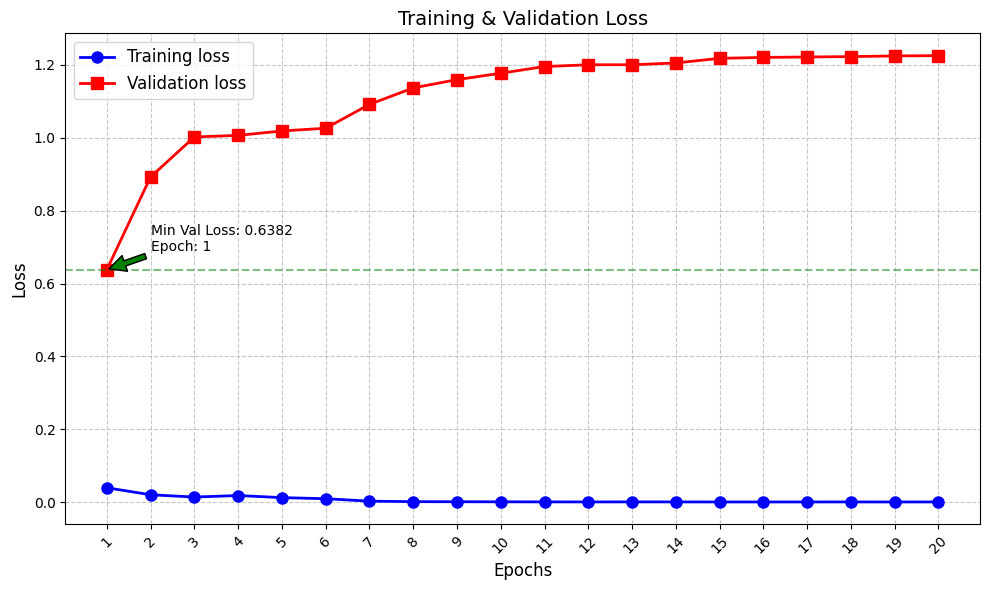

In [21]:
import matplotlib.pyplot as plt

# Check available keys in history to handle different versions
print("Available keys in history:", list(history.history.keys()))

# Extract loss metrics - handle different naming conventions
train_loss = history.history.get('loss', history.history.get('train_loss'))
val_loss = history.history.get('val_loss', history.history.get('val_loss'))

if train_loss is None or val_loss is None:
    available_keys = list(history.history.keys())
    raise ValueError(f"Loss data not found. Available keys: {available_keys}")

# Get epochs range
epochs = range(1, len(train_loss) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', linewidth=2, markersize=8, label='Training loss')  # Blue circles with connecting line
plt.plot(epochs, val_loss, 'rs-', linewidth=2, markersize=8, label='Validation loss')   # Red squares with connecting line

# Add titles and labels
plt.title('Training & Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Improve x-axis ticks
plt.xticks(epochs, rotation=45)  # Show all epoch numbers
plt.tight_layout()  # Prevent label cutoff

# Add horizontal line at minimum validation loss
min_val_loss = min(val_loss)
min_val_epoch = epochs[val_loss.index(min_val_loss)]
plt.axhline(y=min_val_loss, color='g', linestyle='--', alpha=0.5)
plt.annotate(f'Min Val Loss: {min_val_loss:.4f}\nEpoch: {min_val_epoch}',
             xy=(min_val_epoch, min_val_loss),
             xytext=(min_val_epoch+1, min_val_loss+0.05),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.show()

## Train the final model and test it

In [ ]:
test_metrics = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 515s 21ms/step


In [ ]:
test_accuracy = test_metrics[1]
test_loss = test_metrics[0]
print("Test Accuracy :", test_accuracy)

Test Accuracy : 0.8591200113296509
